## Universidad Autonoma de Aguascalientes
## Departamende: Ciencias de la Computación
## Carrera: Ingenieria en Computación Inteligente 
## Curso: Aprendizaje Inteligente
## Maestro: Dr. Francisco Javier Luna Rosas
## Alumno: Sebastian Aguilar Serna
## Semestre: Enero-Junio del 2026

# Practica 10: Redes Neuronales K-FOLD CROSS-VALIDATION para realizar análisis de sentimientos

## Paso 1: Importar las librerias necesarias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

## Paso 2: Cargamos el dataset y lo separamos en review y sentiment, ya que son es un único arreglo de información

In [6]:
df = pd.read_csv('movie_data.csv', sep='\t')
df[['review', 'sentiment']] = df['review,sentiment'].str.rsplit(',', n=1, expand=True)

print(df.head())

                                    review,sentiment  \
0  In 1974, the teenager Martha Moxley (Maggie Gr...   
1  OK... so... I really like Kris Kristofferson a...   
2  ***SPOILER*** Do not read this, if you think a...   
3  hi for all the people who have seen this wonde...   
4  I recently bought the DVD, forgetting just how...   

                                              review sentiment  
0  In 1974, the teenager Martha Moxley (Maggie Gr...         1  
1  OK... so... I really like Kris Kristofferson a...         0  
2  ***SPOILER*** Do not read this, if you think a...         0  
3  hi for all the people who have seen this wonde...         1  
4  I recently bought the DVD, forgetting just how...         0  


## Paso 3: Convertimos la columna review en un arreglo (variable predictora)

In [8]:
array_df0 = df['review'].to_numpy()

print("array_df0:", array_df0[:5])   # primeras 5

array_df0: ['In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful an

## Paso 4: Convertimos la columna sentiment en un arreglo (variable a predecir)

In [10]:
array_df1 = df['sentiment'].to_numpy()

print("array_df1:", array_df1[:5])

array_df1: ['1' '0' '0' '1' '0']


## Paso 5: Creamos un pipeline para el metodo de entrenamiento.

In [12]:
modelo = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

## Paso 6: Aplicamos el K-Fold

In [14]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(modelo, array_df0, array_df1,
                         cv=kf, scoring="accuracy")

## Paso 7: Imprimimos los resultados

In [16]:
print("Accuracy por fold:", scores)
print("Accuracy promedio:", np.mean(scores))

Accuracy por fold: [0.8644 0.8694 0.874  0.8632 0.8678 0.8572 0.8662 0.8606 0.8666 0.8598]
Accuracy promedio: 0.86492


## Paso 8: Graficamos la variación del error

Error por fold: [0.1356 0.1306 0.126  0.1368 0.1322 0.1428 0.1338 0.1394 0.1334 0.1402]


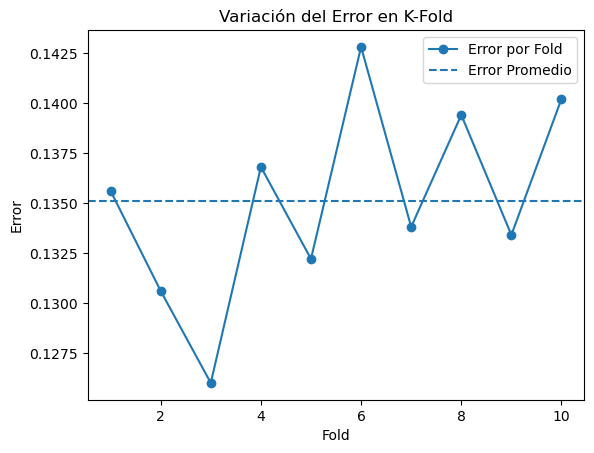

In [18]:
errores = 1 - scores

print("Error por fold:", errores)

plt.figure()
plt.plot(range(1, k+1), errores, marker="o", label="Error por Fold")

plt.axhline(np.mean(errores), linestyle="--", label="Error Promedio")

plt.title("Variación del Error en K-Fold")
plt.xlabel("Fold")
plt.ylabel("Error")

plt.legend()
plt.show()